## Chapter9 - Working with Structured Data:

In [1]:
!pip install pymed wordcloud --quiet

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Getting Data:

In [3]:
from pymed import PubMed
pubmed = PubMed()

In [4]:
query = "monoclonal antibody"

In [5]:
results = pubmed.query(query, max_results=100)

In [6]:
results

In [7]:
articleList = []
for article in results:
    articleDict = article.toDict()
    articleList.append(articleDict)

In [8]:
df = pd.DataFrame(articleList)
df.head()

,pubmed_id,title,abstract,keywords,journal,publication_date,authors,methods,conclusions,results,copyrights,doi,xml
0,34837637\n32819891\n32730743\n31852602\n323898...,The Nutrition-COVID-19 Interplay: a Review.,Nutritional status is affected by the COVID-19...,"[Ageusia, COVID-19, Double burden of malnutrit...",Current nutrition reports,2021-11-28,"[{'lastname': 'Antwi', 'firstname': 'Janet', '...",None,None,None,© 2021. The Author(s).,10.1007/s13668-021-00380-2\n10.1136/bmj.m3193\...,"[[[], [<Element 'Year' at 0x000001D3903F3F90>,..."
1,34837630\n21109520\n26703005\n28752489\n280875...,Evidence for the Use of Secukinumab in Patient...,Axial spondyloarthritis (axSpA) is an inflamma...,[Assessment of SpondyloArthritis international...,Rheumatology and therapy,2021-11-28,"[{'lastname': 'Aparicio', 'firstname': 'María'...",None,None,None,© 2021. The Author(s).,10.1007/s40744-021-00400-1\n10.1136/ard.2010.1...,"[[[], [<Element 'Year' at 0x000001D390433E50>,..."
2,34837242,Isolation of nanobodies with potential to redu...,Recent studies showed that a single injection ...,"[Allergy, Bet v 1, IgE, Nanobody, VHH]",Allergy,2021-11-28,"[{'lastname': 'Zettl', 'firstname': 'Ines', 'i...",None,We identified high-affinity Bet v 1-specific n...,We isolated three nanobodies that recognize Be...,This article is protected by copyright. All ri...,10.1111/all.15191,"[[[], [<Element 'Year' at 0x000001D39076CBD0>,..."
3,34836485,A monoclonal antibody that neutralizes SARS-Co...,The repeated emergence of highly pathogenic hu...,[],Emerging microbes & infections,2021-11-28,"[{'lastname': 'Wang', 'firstname': 'Pengfei', ...",None,None,None,None,10.1080/22221751.2021.2011623,"[[[], [<Element 'Year' at 0x000001D390773B80>,..."
4,34835657,Multifunctional Nanopolymers for Blood-Brain B...,Glioblastoma (GBM) is the most prevalent prima...,"[blood–brain barrier, brain tumor, cancer immu...","Nanomaterials (Basel, Switzerland)",2021-11-28,"[{'lastname': 'Patil', 'firstname': 'Rameshwar...",None,None,None,None,10.3390/nano11112892,"[[[], [<Element 'Year' at 0x000001D390780860>,..."


### Analyzing Character Distributions:

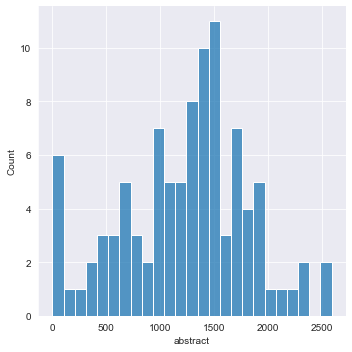

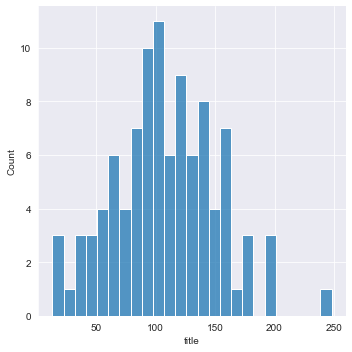

In [9]:
sns.displot(df.abstract.str.len(), bins=25)
sns.displot(df.title.str.len(), bins=25)

In [10]:
df["text"] = df["title"] + " " + df["abstract"]

In [11]:
df[["title", "abstract", "text"]]

,title,abstract,text
0,The Nutrition-COVID-19 Interplay: a Review.,Nutritional status is affected by the COVID-19...,The Nutrition-COVID-19 Interplay: a Review. Nu...
1,Evidence for the Use of Secukinumab in Patient...,Axial spondyloarthritis (axSpA) is an inflamma...,Evidence for the Use of Secukinumab in Patient...
2,Isolation of nanobodies with potential to redu...,Recent studies showed that a single injection ...,Isolation of nanobodies with potential to redu...
3,A monoclonal antibody that neutralizes SARS-Co...,The repeated emergence of highly pathogenic hu...,A monoclonal antibody that neutralizes SARS-Co...
4,Multifunctional Nanopolymers for Blood-Brain B...,Glioblastoma (GBM) is the most prevalent prima...,Multifunctional Nanopolymers for Blood-Brain B...
...,...,...,...
95,Hexavalent sperm-binding IgG antibody released...,Nonhormonal products for on-demand contracepti...,Hexavalent sperm-binding IgG antibody released...
96,Cochrane corner: PCSK9 monoclonal antibodies f...,None,NaN
97,A chemiluminescence immunoassay for precise au...,"Currently, quality control of glycoprotein in ...",A chemiluminescence immunoassay for precise au...
98,Development of an LC-MS/MS method to simultane...,"Recently, monoclonal antibody (mAb) therapy ha...",Development of an LC-MS/MS method to simultane...


In [12]:
print(df.title.str.len().mean())
print(df.abstract.str.len().mean())
print(df.text.str.len().mean())


107.55
1233.7448979591836
1342.7244897959183


In [13]:
df.text.str.split(expand=True).stack().value_counts()

the             759
of              721
and             707
in              416
to              332
               ... 
gene-related      1
milestones        1
tracer.           1
(up               1
products,         1
Length: 5826, dtype: int64

### Cleaning Data:

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

import re

STOP_WORDS = stopwords.words()

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:17: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, defaultdict
[nltk_data] Downloading package punkt to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
def cleaner(text):
    if type(text) == str:
        text = text.lower()
        text = re.sub("[^a-zA-Z]+", ' ', text)
        text_tokens = word_tokenize(text)
        tokens_without_sw = [word for word in text_tokens if not word in STOP_WORDS]
        filtered_sentence = (" ").join(tokens_without_sw)
        return filtered_sentence

In [16]:
cleaner("Biotech in 2021 is a wonderful field to work and study in!")

'biotech wonderful field work study'

In [17]:
df["clean_text"] = df["text"].apply(lambda x: cleaner(x))

In [18]:
df[["text", "clean_text"]].head()

,text,clean_text
0,The Nutrition-COVID-19 Interplay: a Review. Nu...,nutrition covid interplay review nutritional s...
1,Evidence for the Use of Secukinumab in Patient...,evidence use secukinumab patients radiographic...
2,Isolation of nanobodies with potential to redu...,isolation nanobodies potential reduce patients...
3,A monoclonal antibody that neutralizes SARS-Co...,monoclonal antibody neutralizes sars cov varia...
4,Multifunctional Nanopolymers for Blood-Brain B...,multifunctional nanopolymers blood brain barri...


In [19]:
df.clean_text.str.split(expand=True).stack().value_counts()

patients      120
treatment     107
monoclonal    106
anti           88
antibody       86
             ... 
crystals        1
formulated      1
electron        1
appointed       1
made            1
Length: 3511, dtype: int64

In [24]:
df2 = df[["clean_text"]].dropna()
# df2 = df[df["clean_text"].str.len() > 100]

df2.shape

(98, 1)

In [25]:
df["clean_text"].head()

0    nutrition covid interplay review nutritional s...
1    evidence use secukinumab patients radiographic...
2    isolation nanobodies potential reduce patients...
3    monoclonal antibody neutralizes sars cov varia...
4    multifunctional nanopolymers blood brain barri...
Name: clean_text, dtype: object

### Creating WordClouds:

In [26]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [27]:
wordcloud = WordCloud(width = 5000, 
                      height = 3000, 
                      random_state=1, 
                      background_color='white', 
                      colormap='Blues', 
                      collocations=False, 
                      stopwords = STOPWORDS).generate(' '.join(df2['clean_text']))


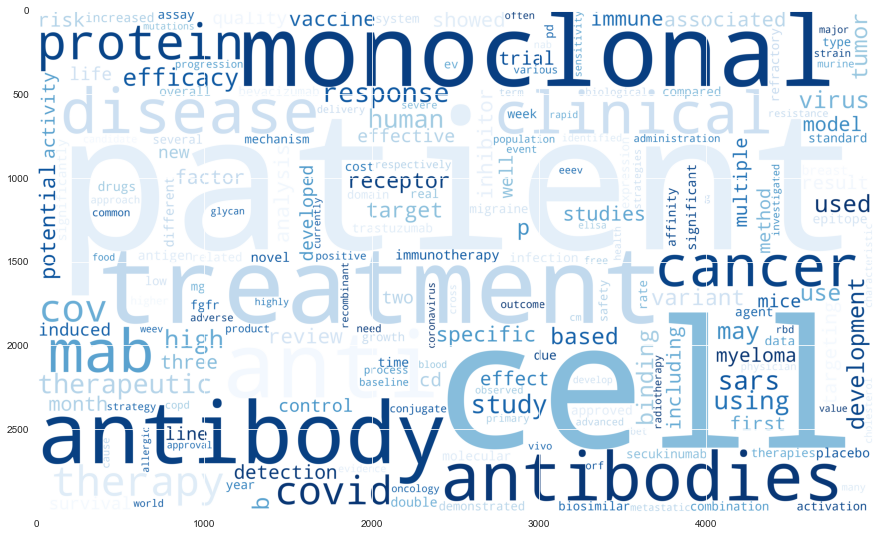

In [28]:
plt.figure( figsize=(15,10) )
plt.imshow(wordcloud)